In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
%matplotlib inline


plt.style.use('seaborn')
sns.set(font_scale=1.5)

from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [7]:
boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', boston_df.shape)
boston_df.head()

y_target = boston_df['PRICE']
X_features = boston_df.drop('PRICE', axis=1, inplace=False)

Boston 데이터 세트 크기: (506, 14)


In [10]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_features, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE scores: ', np.round(avg_rmse, 3))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE scores:  5.518


In [11]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_features, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {} 일 때 5 folds 의 평균 RMSE : {:3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.828659
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788487
alpha 1 일 때 5 folds 의 평균 RMSE : 5.652571
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518166
alpha 100 일 때 5 folds 의 평균 RMSE : 5.329590


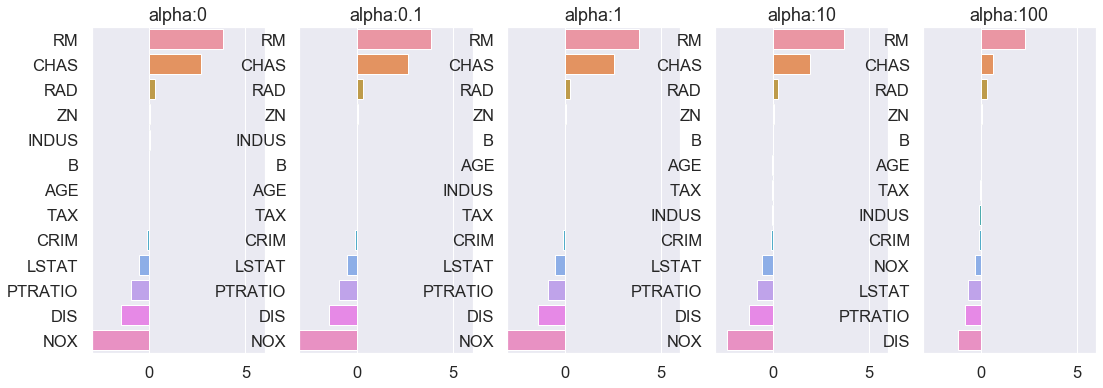

In [12]:
fig, ax = plt.subplots(1,5, figsize=(18,6))

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_features, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_features.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[pos])

In [16]:
coeff_df

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


In [17]:
coeff

RM         2.334536
CHAS       0.638335
RAD        0.315358
ZN         0.054496
B          0.009393
AGE        0.001212
TAX       -0.015856
INDUS     -0.052826
CRIM      -0.102202
NOX       -0.262847
LSTAT     -0.660764
PTRATIO   -0.829218
DIS       -1.153390
dtype: float64

In [20]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


NameError: name 'coef_' is not defined

In [22]:
ridge.coef_

array([-1.02201585e-01,  5.44964806e-02, -5.28263046e-02,  6.38334836e-01,
       -2.62847034e-01,  2.33453579e+00,  1.21168955e-03, -1.15338989e+00,
        3.15357579e-01, -1.58557572e-02, -8.29217879e-01,  9.39260996e-03,
       -6.60763828e-01])